In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Cars.csv')
df.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [4]:
# HP is horse power, MPG is Milles per Gallon, VOL is Volume, SP is top speed, WT is weight
# Here the MPG is the output variable so we need to move it to the left side of the table
# rearranging the y col
df=df.iloc[:,[1,0,2,3,4]]
df

,MPG,HP,VOL,SP,WT
0,53.700681,49,89,104.185353,28.762059
1,50.013401,55,92,105.461264,30.466833
2,50.013401,55,92,105.461264,30.193597
3,45.696322,70,92,113.461264,30.632114
4,50.504232,53,92,104.461264,29.889149
...,...,...,...,...,...
76,36.900000,322,50,169.598513,16.132947
77,19.197888,238,115,150.576579,37.923113
78,34.000000,263,50,151.598513,15.769625
79,19.833733,295,119,167.944460,39.423099


In [5]:
df.shape

(81, 5)

In [6]:
df.describe()

,MPG,HP,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,34.422076,117.469136,98.765432,121.540272,32.412577
std,9.131445,57.113502,22.301497,14.181432,7.492813
min,12.101263,49.000000,50.000000,99.564907,15.712859
25%,27.856252,84.000000,89.000000,113.829145,29.591768
50%,35.152727,100.000000,101.000000,118.208698,32.734518
75%,39.531633,140.000000,113.000000,126.404312,37.392524
max,53.700681,322.000000,160.000000,169.598513,52.997752


In [7]:
df.duplicated().any()

False

In [8]:
df.columns

Index(['MPG', 'HP', 'VOL', 'SP', 'WT'], dtype='object')

In [9]:
df.value_counts()

MPG        HP   VOL  SP          WT       
12.101263  236  107  139.840817  34.948615    1
35.404192  103  107  121.840817  35.549360    1
39.431235  84   114  113.484609  37.042350    1
                101  112.288996  33.234361    1
39.354094  92   99   122.105055  32.813592    1
                                             ..
29.629936  115  124  120.404312  40.398164    1
                101  118.288996  33.458472    1
                                 33.436711    1
                                 33.213954    1
53.700681  49   89   104.185353  28.762059    1
Length: 81, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     81 non-null     float64
 1   HP      81 non-null     int64  
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


<AxesSubplot: >

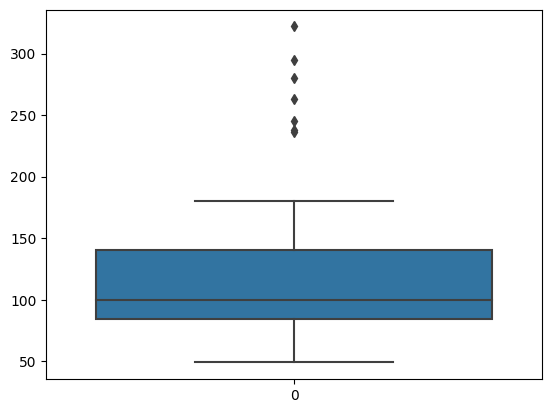

In [11]:
sns.boxplot(df['HP'])

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.corr()

,MPG,HP,VOL,SP,WT
MPG,1.000000,-0.725038,-0.529057,-0.687125,-0.526759
HP,-0.725038,1.000000,0.077459,0.973848,0.076513
VOL,-0.529057,0.077459,1.000000,0.102170,0.999203
SP,-0.687125,0.973848,0.102170,1.000000,0.102439
WT,-0.526759,0.076513,0.999203,0.102439,1.000000


<AxesSubplot: >

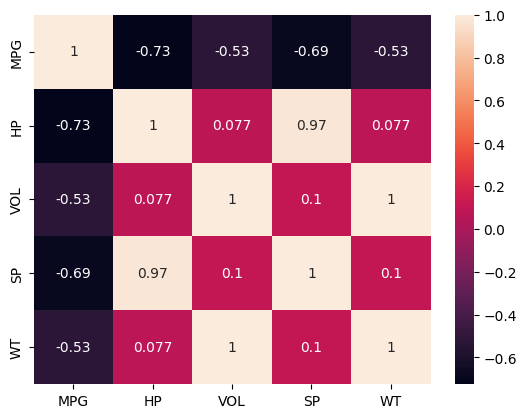

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# Extracting the dependent and independent variable
x=df.iloc[:,1:]
y=df.iloc[:,0]
print(x.head(),'\n\n\n\n',y.head())

   HP  VOL          SP         WT
0  49   89  104.185353  28.762059
1  55   92  105.461264  30.466833
2  55   92  105.461264  30.193597
3  70   92  113.461264  30.632114
4  53   92  104.461264  29.889149 



 0    53.700681
1    50.013401
2    50.013401
3    45.696322
4    50.504232
Name: MPG, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
df_lr=LinearRegression()
df_lr.fit(x_train,y_train)

LinearRegression()

In [18]:
df_pred=df_lr.predict(x_test)
df_pred

array([48.81816223, 30.02330998, 40.22432732, 34.40212312, 41.67871237,
       43.34946819, 32.82858794, 37.98959309, 36.27953571, 35.5683456 ,
       41.80988356, 43.3100888 , 37.06131496, 26.14461171, 31.85736789,
       41.53121854, 49.07377826])

In [19]:
from sklearn import metrics
df_r2score=metrics.r2_score(y_test,df_pred)
df_r2score

0.5820427766568966

In [20]:
# it is not an good r2 score we need to increase it  
# let check the Root mean squared error
df_RMSE=np.sqrt(metrics.mean_squared_error(y_test,df_pred))
df_RMSE

4.785054103045378

## Lasso (L1)

In [33]:
from sklearn.linear_model import Lasso,Ridge

In [46]:
df_lso=Lasso(alpha=0.01,normalize=True)

In [47]:
df_lso.fit(x_train,y_train)

/home/hari/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.01, normalize=True)

In [48]:
df_lso_pred=df_lso.predict(x_test)
df_lso_pred

array([47.95554146, 29.48989458, 39.60059602, 34.72075283, 41.2406749 ,
       42.21078946, 33.59795724, 37.32834034, 36.17069342, 36.01469817,
       41.2406749 , 43.44699543, 37.1823631 , 26.15746425, 32.4165067 ,
       40.77463444, 47.95554146])

In [49]:
df_lso_acc=metrics.r2_score(y_test, df_lso_pred)
df_lso_acc

0.6054042892656694

In [52]:
df_lso_err=np.sqrt(metrics.mean_squared_error(y_test,df_lso_pred))
df_lso_err

4.649402180770597

In [54]:
df_lso.coef_
# you see that the column irrelevent to the model it makes zero, here 4th column made zero

array([-0.16236874, -0.21156584,  0.24150417, -0.        ])

In [57]:
df_lso.alpha

0.01

## Ridge

In [59]:
df_rge = Ridge(alpha=0.01,normalize=True)
df_rge.fit(x_train,y_train)

/home/hari/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.01, normalize=True)

In [62]:
df_rge_pred=df_rge.predict(x_test)
df_rge_pred

array([48.24178443, 29.439517  , 39.80929173, 34.79342121, 41.22174182,
       42.2192381 , 33.6261078 , 37.5650157 , 36.13777799, 36.07332565,
       41.16727511, 43.53546208, 37.12579912, 26.00794765, 32.36975721,
       40.83754399, 48.13564401])

In [64]:
df_rge.coef_
# Here in Redge it does not make the column zero you can see, but it will be towards to zero

array([-0.16916938, -0.13374219,  0.27069065, -0.24090691])

In [66]:
df_rge_acc=metrics.r2_score(y_test,df_rge_pred)
df_rge_acc

0.5998834319529993